# Anatomy of a cranked wing

— Agostino De Marco, <font color='darkblue'><i>University of Naples Federico II, Dept. Industrial Engineering</i></font>

We will use the Python language to work out our examples, so we set up some Python tools first.

In [77]:
# Set up the notebook and import required Python packages
%run ./src/cranked_wing/init.py
%matplotlib inline

Wing data.

In [78]:
c_r = 5.5; c_k = 2.4; c_t = 1.0; 
b_k = 14.0; b = 28
Lambda_le_1 = 24*math.pi/180; Lambda_le_2 = 24*math.pi/180

In [79]:
Latex(
    r'\begin{array}{rl}'
    +  r'\text{root chord,}\, c_{\mathrm{r}}: & ' + r'{0}'.format(c_r) + r'\,\text{m}'
    +  r'\\'
    +  r'\text{kink chord,}\, c_{\mathrm{k}}: & ' + r'{0}'.format(c_k) + r'\,\text{m}'
    +  r'\\'
    +  r'\text{tip chord,}\, c_{\mathrm{t}}: & ' + r'{0}'.format(c_t) + r'\,\text{m}'
    +  r'\\'
    +  r'\text{semispan, inner panel}\, \frac{1}{2}b_{\mathrm{k}}: & ' + r'{0}'.format(b_k/2) + r'\,\text{m}'
    +  r'\\'
    +  r'\text{semispan,}\, \frac{1}{2}b: & ' + r'{0}'.format(b/2) + r'\,\text{m}'
    +  r'\\'
    +  r'\text{leading edge sweep, inner panel,}\, \Lambda_{\mathrm{le},1}: &' 
    +    r'{0}'.format(Lambda_le_1*180/math.pi) + r'\,\text{deg}'
    +  r'\\'
    +  r'\text{leading edge sweep, outer panel,}\, \Lambda_{\mathrm{le},2}: &' 
    +    r'{0}'.format(Lambda_le_2*180/math.pi) + r'\,\text{deg}'
    +r'\end{array}'
)

<IPython.core.display.Latex object>

Wing platform.

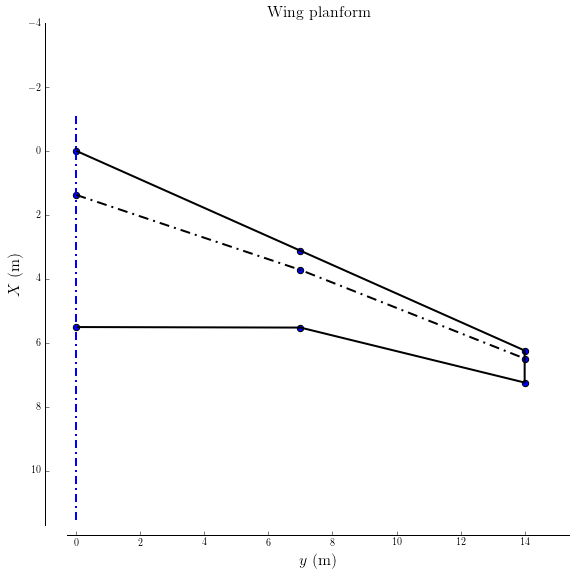

In [80]:
plot_planform(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2)

### The law of the chords, $c(y)$

The function $c(y)$ is the piecewise linear law that gives the chord at the generic spanwise station $y\in \big[0,\frac{1}{2}b\big]$. This has the form

\begin{equation}
c(y) = 
\begin{cases}
A_{c,1} y + B_{c,1}  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{c,2} \big( y - \frac{1}{2}b_{\mathrm{k}} \big) + B_{c,2} & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

with 

\begin{equation}
A_{c} = 
\begin{cases}
A_{c,1} = \dfrac{2}{b_{\mathrm{k}}} \left( c_{\mathrm{k}} - c_{\mathrm{r}} \right)  
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{c,2} = \dfrac{2}{b - b_{\mathrm{k}}} \left( c_{\mathrm{t}} - c_{\mathrm{k}} \right)  
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

and

\begin{equation}
B_{c} = 
\begin{cases}
B_{c,1} = c_{\mathrm{r}}
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
B_{c,2} = c_{\mathrm{k}}
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

The following code defines function $c(y)$ calculating the above two coefficients:

In [81]:
# c(y)
def f_chords(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2, y):
    if y >= 0 and y <= b_k/2:
        A_c = 2*(c_k - c_r)/b_k; B_c = c_r;
        return A_c*y + B_c
    elif y > b_k/2 and y <= b/2:
        A_c = (c_t - c_k)/(b/2 - b_k/2); B_c = c_k;
        return A_c*(y - b_k/2) + B_c
    
def f_chords_1(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2, y):
    A_c = 2*(c_k - c_r)/b_k; B_c = c_r;
    return A_c*y + B_c

def f_chords_2(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2, y):
    A_c = (c_t - c_k)/(b/2 - b_k/2); B_c = c_k;
    return A_c*(y - b_k/2) + B_c

### The law of the leading edge positions, $X_{\mathrm{le}}(y)$

The function $X_{\mathrm{le}}(y)$ is the piecewise law that gives the local leading edge longitudinal coordinate at the generic spanwise station $y\in \big[0,\frac{1}{2}b\big]$. This has the form

\begin{equation}
X_{\mathrm{le}}(y) = 
\begin{cases}
A_{X_{\mathrm{le}},1} \, y + B_{X_{\mathrm{le}},1}  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{X_{\mathrm{le}},2} \, \big( y - \frac{1}{2}b_{\mathrm{k}} \big) + B_{X_{\mathrm{le}},2} & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

with 

\begin{equation}
A_{X_{\mathrm{le}}} = 
\begin{cases}
A_{X_{\mathrm{le}},1} = \tan \Lambda_{\mathrm{le},1}
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{X_{\mathrm{le}},2} = \tan \Lambda_{\mathrm{le},2}
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

and

\begin{equation}
B_{X_{\mathrm{le}}} = 
\begin{cases}
B_{X_{\mathrm{le}},1} = 0 \, \mathrm{m}
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
B_{X_{\mathrm{le}},2} = \frac{1}{2} b_{\mathrm{k}} \, \tan \Lambda_{\mathrm{le},1}
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

In [82]:
# X_le(y)
def f_Xle(b_k, b, Lambda_le_1, Lambda_le_2, y):
    if y >= 0 and y <= b_k/2:
        A_xle = math.tan(Lambda_le_1);
        return A_xle*y
    elif y > b_k/2 and y <= b/2:
        A_xle = math.tan(Lambda_le_2);
        return (b_k/2)*math.tan(Lambda_le_1) + A_xle*(y - b_k/2)
    
def f_Xle_1(b_k, b, Lambda_le_1, Lambda_le_2, y):
    A_xle = math.tan(Lambda_le_1);
    return A_xle*y
    
def f_Xle_2(b_k, b, Lambda_le_1, Lambda_le_2, y):
    A_xle = math.tan(Lambda_le_2);
    return (b_k/2)*math.tan(Lambda_le_1) + A_xle*(y - b_k/2)

### Calculate $S$, $\bar{c}$, $X_{\mathrm{le},\bar{c}}$, and $Y_{\bar{c}}$

The reference surface:

\begin{equation}
S = 2 \int_{0}^{b/2} c(y) \, \mathrm{d}y
\end{equation}

The mean aerodynamic chord:

\begin{equation}
\bar{c} = \frac{2}{S} \int_{0}^{b/2} c^2(y) \, \mathrm{d}y
\end{equation}

The mean aerodynamic chord leading edge:

\begin{equation}
X_{\mathrm{le},\bar{c}} = \frac{2}{S} \int_{0}^{b/2} X_{\mathrm{le}}(y) \, c(y) \, \mathrm{d}y
\end{equation}

The mean aerodynamic chord spanwise location:

\begin{equation}
Y_{\bar{c}} = \frac{2}{S} \int_{0}^{b/2} y \, c(y) \, \mathrm{d}y
\end{equation}

In [83]:
# %run ./src/aerodynamic_center_wing/init.py
# symbolic variable
y = Symbol('y')

# indefinite integrals
c_law_integral_indefinite =  integrate( 
    Piecewise(
        (f_chords_1(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2, y), And(y >= 0, y <= b_k/2)), 
        (f_chords_2(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2, y), And(y > b_k/2, y <= b/2))
    ),
    y)

c_mac_law_integral_indefinite =  integrate( 
    Piecewise( 
        (f_chords_1(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2, y)**2, And(y >= 0, y <= b_k/2)),
        (f_chords_2(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2, y)**2, And(y > b_k/2, y <= b/2))
    ),
    y)

X_le_mac_law_integral_indefinite = integrate( 
    Piecewise( 
        (
            f_Xle_1(b_k, b, Lambda_le_1, Lambda_le_2, y)
                *f_chords_1(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2, y), 
            And(y >= 0, y <= b_k/2)
        ), 
        (
            f_Xle_2(b_k, b, Lambda_le_1, Lambda_le_2, y)
                *f_chords_2(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2, y), 
            And(y > b_k/2, y <= b/2)
        )
    ),
    y)

Y_mac_law_integral_indefinite = integrate( 
    Piecewise( 
        (
            y*f_chords_1(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2, y), 
            And(y >= 0, y <= b_k/2)
        ), 
        (
            y*f_chords_2(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2, y), 
            And(y > b_k/2, y <= b/2)
        )
    ),
    y)

In [84]:
print('\nIndefinite integral of c^2(y): ' + str(c_law_integral_indefinite))

Latex(
    r'\begin{equation}'
    r'\int c(y) \, \mathrm{d}y ='
    + latex(c_law_integral_indefinite)
    +r'\end{equation}'
)


Indefinite integral of c^2(y): Piecewise((-0.221428571428571*y**2 + 5.5*y, And(y <= 7.0, y >= 0)), (-0.1*y**2 + 3.8*y, And(y <= 14.0, y > 7.0)))


<IPython.core.display.Latex object>

In [85]:
S_ref = 2*(c_law_integral_indefinite.subs(y,b/2) - c_law_integral_indefinite.subs(y,0))
print('S = {0} m^2'.format(S_ref))
S_1 = 2*(c_law_integral_indefinite.subs(y,b_k/2) - c_law_integral_indefinite.subs(y,0))
print('S_1 = {0} m^2'.format(S_1))
S_2 = 2*(c_law_integral_indefinite.subs(y,b/2) - c_law_integral_indefinite.subs(y,b_k/2))
print('S_2 = {0} m^2'.format(S_2))

S = 67.2000000000000 m^2
S_1 = 55.3000000000000 m^2
S_2 = 11.9000000000000 m^2


In [86]:
print('\nIndefinite integral of c^2(y): ' + str(c_mac_law_integral_indefinite))

Latex(
    r'\begin{equation}'
    r'\int c^2(y) \, \mathrm{d}y ='
    + latex(c_mac_law_integral_indefinite)
    +r'\end{equation}'
)


Indefinite integral of c^2(y): Piecewise((0.0653741496598639*y**3 - 2.43571428571429*y**2 + 30.25*y, And(y <= 7.0, y >= 0)), (0.0133333333333333*y**3 - 0.76*y**2 + 14.44*y, And(y <= 14.0, y > 7.0)))


<IPython.core.display.Latex object>

In [87]:
c_mac = (2/S_ref)*(c_mac_law_integral_indefinite.subs(y,b/2) - c_mac_law_integral_indefinite.subs(y,0))
print('mac = {0} m'.format(c_mac))


mac = 2.67222222222222 m


In [88]:
print('\nIndefinite integral of X_le(y)*c(y): ' + str(X_le_mac_law_integral_indefinite))

Latex(
    r'\begin{equation}'
    r'\int X_{\mathrm{le}}(y) \, c(y) \, \mathrm{d}y ='
    + latex(X_le_mac_law_integral_indefinite)
    +r'\end{equation}'
)


Indefinite integral of X_le(y)*c(y): Piecewise((-0.0657242344979268*y**3 + 1.22437888459847*y**2, And(y <= 7.0, y >= 0)), (-0.0296819123539024*y**3 + 0.845934502086219*y**2, And(y <= 14.0, y > 7.0)))


<IPython.core.display.Latex object>

In [89]:
X_le_mac = (2/S_ref)*(X_le_mac_law_integral_indefinite.subs(y,b/2) - X_le_mac_law_integral_indefinite.subs(y,0))
print('X_le_mac = {0} m'.format(X_le_mac))


X_le_mac = 2.51059508660091 m


In [90]:
print('\nIndefinite integral of y*c(y): ' + str(Y_mac_law_integral_indefinite))

Latex(latex(Y_mac_law_integral_indefinite))
Latex(
    r'\begin{equation}'
    r'\int y \, c(y) \, \mathrm{d}y ='
    + latex(Y_mac_law_integral_indefinite)
    +r'\end{equation}'
)


Indefinite integral of y*c(y): Piecewise((-0.147619047619048*y**3 + 2.75*y**2, And(y <= 7.0, y >= 0)), (-0.0666666666666667*y**3 + 1.9*y**2, And(y <= 14.0, y > 7.0)))


<IPython.core.display.Latex object>

In [91]:
Y_mac = (2/S_ref)*(Y_mac_law_integral_indefinite.subs(y,b/2) - Y_mac_law_integral_indefinite.subs(y,0))
print('Y_mac = {0} m'.format(Y_mac))


Y_mac = 5.63888888888889 m


### The laws of geometric twist $\epsilon_{\mathrm{g}}(y)$ and of profile zero-lift angle of attack $\alpha_{0\ell}(y)$

The function $\epsilon_{\mathrm{g}}(y)$ is the piecewise law that gives the geometric twist of the wing sectiont at the generic spanwise station $y\in \big[0,\frac{1}{2}b\big]$. This has the form

\begin{equation}
\epsilon_{\mathrm{g}}(y) = 
\begin{cases}
A_{\epsilon,1} \, y + B_{\epsilon,1}  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{\epsilon,2} \, \big( y - \frac{1}{2}b_{\mathrm{k}} \big) + B_{\epsilon,2} & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

with 

\begin{equation}
A_{\epsilon} = 
\begin{cases}
A_{\epsilon,1} = \dfrac{2}{b_{\mathrm{k}}}\, \epsilon_{\mathrm{g,k}}
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{\epsilon,2} = \dfrac{2}{b - b_{\mathrm{k}}}\, \big( \epsilon_{\mathrm{g,t}} - \epsilon_{\mathrm{g,k}} \big)
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

and

\begin{equation}
B_{\epsilon} = 
\begin{cases}
B_{\epsilon,1} = 0 \, \mathrm{rad}
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
B_{\epsilon,2} = \epsilon_{\mathrm{g,k}}
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

Let us assign the geometric twist at kink and tip sections:

In [92]:
eps_k = 0*math.pi/180
eps_t = -2.0*math.pi/180

The following code defines function $\epsilon_{\mathrm{g}}(y)$ calculating the above two coefficients:

In [93]:
# eps_g(y)
def f_twist(eps_k, eps_t, b_k, b, y):
    if y >= 0 and y <= b_k/2:
        A_ = 2*eps_k/b_k; B_ = 0;
        return A_*y + B_
    elif y > b_k/2 and y <= b/2:
        A_ = (eps_t - eps_k)/(b/2 - b_k/2); B_ = eps_k;
        return A_*(y - b_k/2) + B_
    
def f_twist_1(eps_k, eps_t, b_k, b, y):
    A_ = 2*eps_k/b_k; B_ = 0;
    return A_*y + B_

def f_twist_2(eps_k, eps_t, b_k, b, y):
    A_ = (eps_t - eps_k)/(b/2 - b_k/2); B_ = eps_k;
    return A_*(y - b_k/2) + B_

The function $\alpha_{0\ell}(y)$ is the piecewise law that gives the zero-lift angle of attack of the wing sectiont at the generic spanwise station $y\in \big[0,\frac{1}{2}b\big]$. This has the form

\begin{equation}
\alpha_{0\ell}(y) = 
\begin{cases}
A_{\alpha,1} \, y + B_{\alpha,1}  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{\alpha,2} \, \big( y - \frac{1}{2}b_{\mathrm{k}} \big) + B_{\alpha,2} & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

with 

\begin{equation}
A_{\alpha} = 
\begin{cases}
A_{\alpha,1} = \dfrac{2}{b_{\mathrm{k}}}\, \alpha_{0\ell,\mathrm{k}}
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{\alpha,2} = \dfrac{2}{b - b_{\mathrm{k}}}\, \big( \alpha_{0\ell,\mathrm{t}} - \alpha_{0\ell,\mathrm{k}} \big)
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

and

\begin{equation}
B_{\alpha} = 
\begin{cases}
B_{\alpha,1} = \alpha_{0\ell,\mathrm{r}}
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
B_{\alpha,2} = \alpha_{0\ell,\mathrm{k}}
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

Let us assign the profile zero-lift alpha at root, kink and tip sections:

In [94]:
alpha0l_r = -3.0*math.pi/180
alpha0l_k = -3.0*math.pi/180
alpha0l_t = -2.0*math.pi/180

The following code defines function $\epsilon_{\mathrm{g}}(y)$ calculating the above two coefficients:

In [95]:
# alpha0l(y)
def f_alpha0l(alpha0l_r, alpha0l_k, alpha0l_t, b_k, b, y):
    if y >= 0 and y <= b_k/2:
        A_ = 2*(alpha0l_k - alpha0l_r)/b_k; B_ = alpha0l_r;
        return A_*y + B_
    elif y > b_k/2 and y <= b/2:
        A_ = (alpha0l_t - alpha0l_k)/(b/2 - b_k/2); B_ = alpha0l_k;
        return A_*(y - b_k/2) + B_
    
def f_alpha0l_1(alpha0l_r, alpha0l_k, alpha0l_t, b_k, b, y):
    A_ = 2*(alpha0l_k - alpha0l_r)/b_k; B_ = alpha0l_r;
    return A_*y + B_

def f_alpha0l_2(alpha0l_r, alpha0l_k, alpha0l_t, b_k, b, y):
    A_ = (alpha0l_t - alpha0l_k)/(b/2 - b_k/2); B_ = alpha0l_k;
    return A_*(y - b_k/2) + B_

## Wing functions

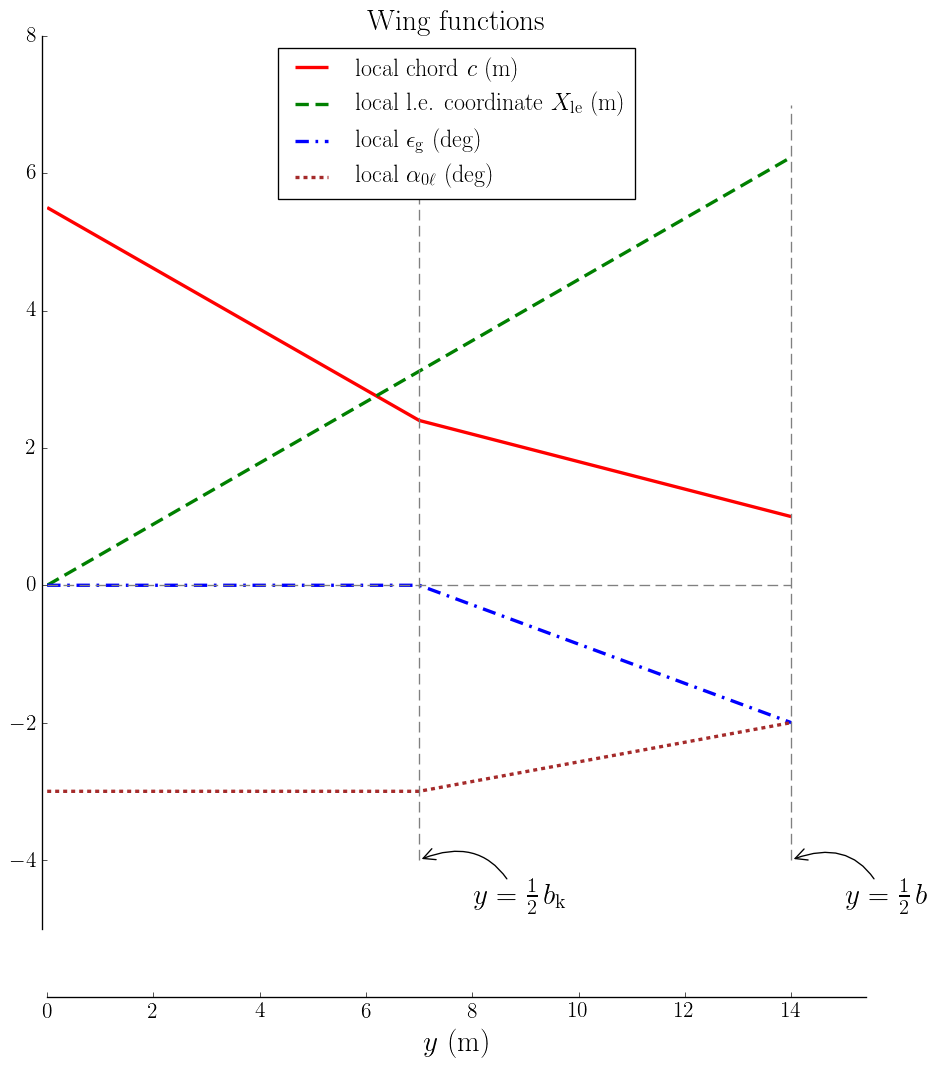

In [96]:
%run ./src/cranked_wing/init.py
plot_wing_functions(c_r, c_k, c_t, 
                    eps_k, eps_t, alpha0l_r, alpha0l_k, alpha0l_t,
                    b_k, b, Lambda_le_1, Lambda_le_2, 
                    f_chords, f_Xle, f_twist, f_alpha0l)

## The wing zero-lift angle of attack $\alpha_{0L,\mathrm{W}}$

The zero-lift angle of attack is given by the following formula:

\begin{equation}
\alpha_{0L,\mathrm{W}} 
  = \frac{2}{S} \int_0^{b/2} 
    \big[\alpha_{0\ell}(y) - \epsilon_{\mathrm{g}}(y)\big]
    c(y) \, \mathrm{d}y
\end{equation}

where the functions $c(y)$, $\alpha_{0\ell}(y)$, and $\epsilon_{\mathrm{g}}(y)$ are the piecewise linear functions defined above.

Let us resolve the above integral with the aid of Python and the package SymPy.

In [97]:
# %run ./src/aerodynamic_center_wing/init.py
# symbolic variable
y = Symbol('y')

# indefinite integrals

alpha0L_law_integral_indefinite = integrate( 
    Piecewise( 
        (
            (f_alpha0l_1(alpha0l_r, alpha0l_k, alpha0l_t, b_k, b, y)
                -f_twist_1(eps_k, eps_t, b_k, b, y))
                *f_chords_1(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2, y), 
            And(y >= 0, y <= b_k/2)
        ), 
        (
            (f_alpha0l_2(alpha0l_r, alpha0l_k, alpha0l_t, b_k, b, y)
                -f_twist_2(eps_k, eps_t, b_k, b, y))
                *f_chords_2(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2, y), 
            And(y > b_k/2, y <= b/2)
        )
    ),
    y)


In [98]:
print('\nIndefinite integral of [(]alpha_0l(y) - eps_g(y)]*c(y): ' + str(alpha0L_law_integral_indefinite))

Latex(
    r'\begin{equation}'
    r'\int \big[\alpha_{0\ell}(y) - \epsilon_{\mathrm{g}}(y)\big] c(y) \, \mathrm{d}y ='
    + latex(alpha0L_law_integral_indefinite)
    +r'\end{equation}'
)


Indefinite integral of [(]alpha_0l(y) - eps_g(y)]*c(y): Piecewise((0.011593972888248*y**2 - 0.287979326579064*y, And(y <= 7.0, y >= 0)), (-0.000498665500569808*y**3 + 0.0246839422782055*y**2 - 0.397935069454707*y, And(y <= 14.0, y > 7.0)))


<IPython.core.display.Latex object>

The definite integral is:

In [ ]:
# definite integral
alpha0L = (2/S_ref)*(alpha0L_law_integral_indefinite.subs(y,b/2) - alpha0L_law_integral_indefinite.subs(y,0))

print('alpha_0L = {0} rad'.format(alpha0L))
print('alpha_0L = {0} deg'.format(alpha0L*180/math.pi))

alpha_0L = -0.0625409648631301 rad
alpha_0L = -3.58333333333333 deg


## TODO: check the above result

In [ ]:
%run ./src/cranked_wing/init.py
plot_planform(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2, mac=c_mac, X_le_mac=X_le_mac, Y_mac=Y_mac) # , X_ac=X_ac